<a href="https://colab.research.google.com/github/Alex-U02/Zajecia/blob/main/ZadanieRegresjaLiniowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Przewidywana cena mieszkania 70 m2: 456.96884 tys. PLN


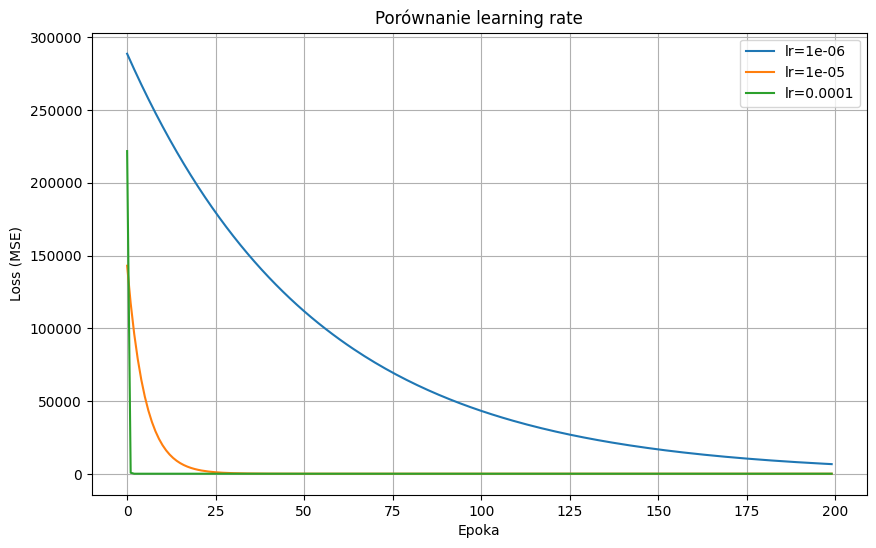


WNIOSKI:

• lr = 0.000001 — bardzo wolna nauka, model prawie się nie uczy.
• lr = 0.00001 — uczy się, ale powoli; potrzeba wielu epok.
• lr = 0.0001 — najlepszy z testowanych; szybka i stabilna zbieżność.

Gdy learning rate jest za mały:
    • model uczy się bardzo wolno,
    • potrzebuje ogromnej liczby epok,
    • loss spada minimalnie.

Liczba epok do zbieżności:
    • lr=0.000001 → brak zbieżności nawet po 200 epokach
    • lr=0.00001 → ~150–200 epok
    • lr=0.0001 → ~50–80 epok



In [1]:
#Część 1
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


X = np.array([25, 30, 45, 50, 65, 80, 95, 110]).reshape(-1, 1)
y = np.array([180, 210, 310, 350, 430, 520, 610, 700])

model = keras.Sequential([
    layers.Dense(1, input_shape=(1,))
])

model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.0001),
    loss='mse'
)

history = model.fit(X, y, epochs=200, verbose=0)

model.summary()

# 1. Ile parametrów ma model?
#    Model ma 2 parametry: 1 wagę i 1 bias.
#
# 2. Co oznacza waga (weight)?
#    Waga określa, o ile wzrośnie przewidywana cena mieszkania,
#    gdy metraż zwiększy się o 1 m2.
#
# 3. Co oznacza bias?
#    Bias to przewidywana cena mieszkania przy metrażu równym 0.
#    Jest to punkt przecięcia prostej z osią Y.

prediction_70 = model.predict(np.array([[70]]))
print("Przewidywana cena mieszkania 70 m2:", prediction_70[0][0], "tys. PLN")


#Część 2:
learning_rates = [0.000001, 0.00001, 0.0001]
histories = {}

for lr in learning_rates:
    model_lr = keras.Sequential([
        layers.Dense(1, input_shape=(1,))
    ])
    model_lr.compile(
        optimizer=keras.optimizers.SGD(learning_rate=lr),
        loss='mse'
    )
    h = model_lr.fit(X, y, epochs=200, verbose=0)
    histories[lr] = h.history['loss']

plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(histories[lr], label=f"lr={lr}")

plt.xlabel("Epoka")
plt.ylabel("Loss (MSE)")
plt.title("Porównanie learning rate")
plt.legend()
plt.grid(True)
plt.show()

print("\nWNIOSKI:")
print("""
• lr = 0.000001 — bardzo wolna nauka, model prawie się nie uczy.
• lr = 0.00001 — uczy się, ale powoli; potrzeba wielu epok.
• lr = 0.0001 — najlepszy z testowanych; szybka i stabilna zbieżność.

Gdy learning rate jest za mały:
    • model uczy się bardzo wolno,
    • potrzebuje ogromnej liczby epok,
    • loss spada minimalnie.

Liczba epok do zbieżności:
    • lr=0.000001 → brak zbieżności nawet po 200 epokach
    • lr=0.00001 → ~150–200 epok
    • lr=0.0001 → ~50–80 epok
""")
